In [3]:
from pandas_plink import read_grm
from pandas_plink import get_data_folder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
%matplotlib inline
import umap
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
filepath = '../spss_gwas2/grm/SPSS.QC.impute2_plink2.allfiles.king_mind1_maf01_geno05.grm.grm.bin'
id_filepath = '../spss_gwas2/grm/SPSS.QC.impute2_plink2.allfiles.king_mind1_maf01_geno05.grm.grm.id'
n_snp_filepath = '../spss_gwas2/grm/SPSS.QC.impute2_plink2.allfiles.king_mind1_maf01_geno05.grm.grm.N.bin'
(K, n_snps) = read_grm(filepath, id_filepath, n_snp_filepath)

df = K.to_pandas()
patient_ID = np.array(df.index)


In [5]:
sc = MinMaxScaler()
data = sc.fit_transform(np.array(df))

In [9]:
embedding = umap.UMAP(n_components=3, n_neighbors=25, min_dist=0.4, random_state=42, metric='correlation')
df_umap = embedding.fit_transform(data)

Text(0, 0.5, 'Y')

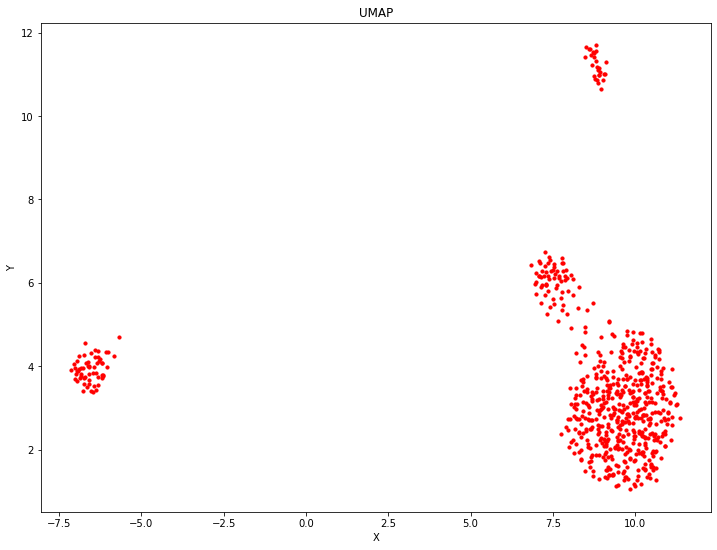

In [10]:
fig = plt.figure(figsize=(12,9))
plt.scatter(df_umap[:, 0], df_umap[:, 1], s=10, c='r')
plt.title('UMAP')
plt.xlabel('X')
plt.ylabel('Y')


Text(0.5, 1.0, 'UMAP')

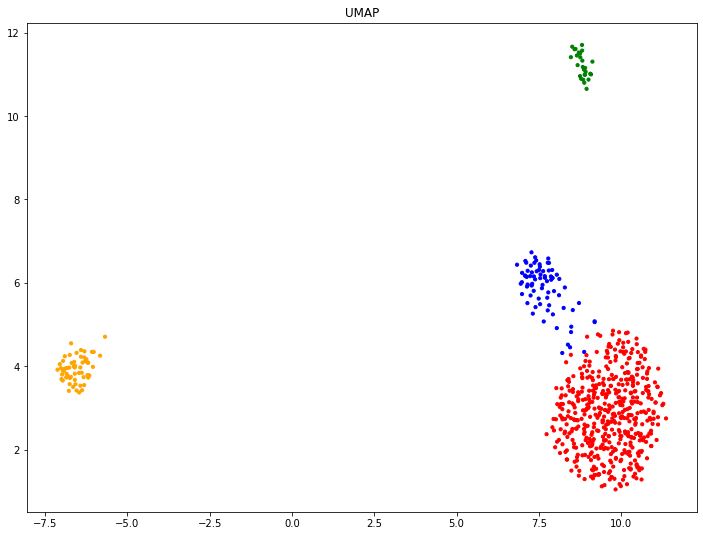

In [11]:
from sklearn.cluster import *

kmeans = KMeans(n_clusters=4, random_state=0)
a = kmeans.fit(df_umap)
color = []
mapping = {0:'blue',1:'orange',2:'green',3:'red'}

for i in range(len(a.labels_)):
    color.append(mapping[a.labels_[i]])

fig = plt.figure(figsize=(12,9))
plt.scatter(df_umap[:, 0], df_umap[:, 1], s=10, c=color)
plt.title('UMAP')


In [12]:
subgroup_0 = patient_ID[np.where(a.labels_ == 0)[0]]
subgroup_1 = patient_ID[np.where(a.labels_ == 1)[0]]
subgroup_2 = patient_ID[np.where(a.labels_ == 2)[0]]
subgroup_3 = patient_ID[np.where(a.labels_ == 3)[0]]

In [14]:
phenotypes = pd.read_csv('./spss_gwas2/sepsis_gwas_v2.csv', header=0, index_col=None)
patient_index1 = sorted(phenotypes['V1'])
patient_index2 = sorted(patient_ID)


In [15]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [16]:
patient_index3 = intersection(patient_index1, patient_index2)

In [17]:
subgroups = []
subgroup_0 = intersection(patient_index3, subgroup_0)
subgroups.append(subgroup_0)
subgroup_1 = intersection(patient_index3, subgroup_1)
subgroups.append(subgroup_1)
subgroup_2 = intersection(patient_index3, subgroup_2)
subgroups.append(subgroup_2)
subgroup_3 = intersection(patient_index3, subgroup_3)
subgroups.append(subgroup_3)


In [18]:
set = [list(phenotypes['V1']).index(x) for x in patient_index3]
phenotypes_filt = phenotypes.iloc[set]

list_0 = sorted([list(phenotypes['V1']).index(x) for x in subgroup_0])
phenotypes_sub0 = phenotypes.iloc[list_0]

list_1 = sorted([list(phenotypes['V1']).index(x) for x in subgroup_1])
phenotypes_sub1 = phenotypes.iloc[list_1]

list_2 = sorted([list(phenotypes['V1']).index(x) for x in subgroup_2])
phenotypes_sub2 = phenotypes.iloc[list_2]

list_3 = sorted([list(phenotypes['V1']).index(x) for x in subgroup_3])
phenotypes_sub3 = phenotypes.iloc[list_3]

phenotypes_sub0['group'] = 0
phenotypes_sub1['group'] = 1
phenotypes_sub2['group'] = 2
phenotypes_sub3['group'] = 3

phenotypes_merged = pd.concat([phenotypes_sub0,phenotypes_sub1,phenotypes_sub2,phenotypes_sub3])

# Categorical variables

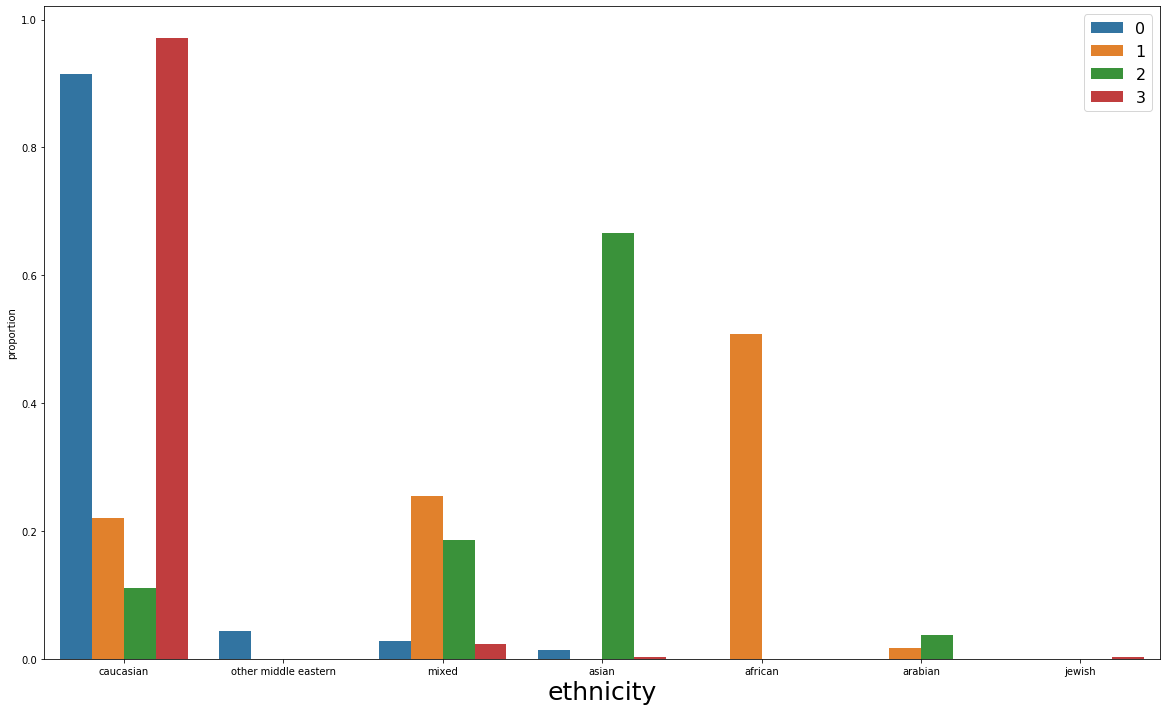

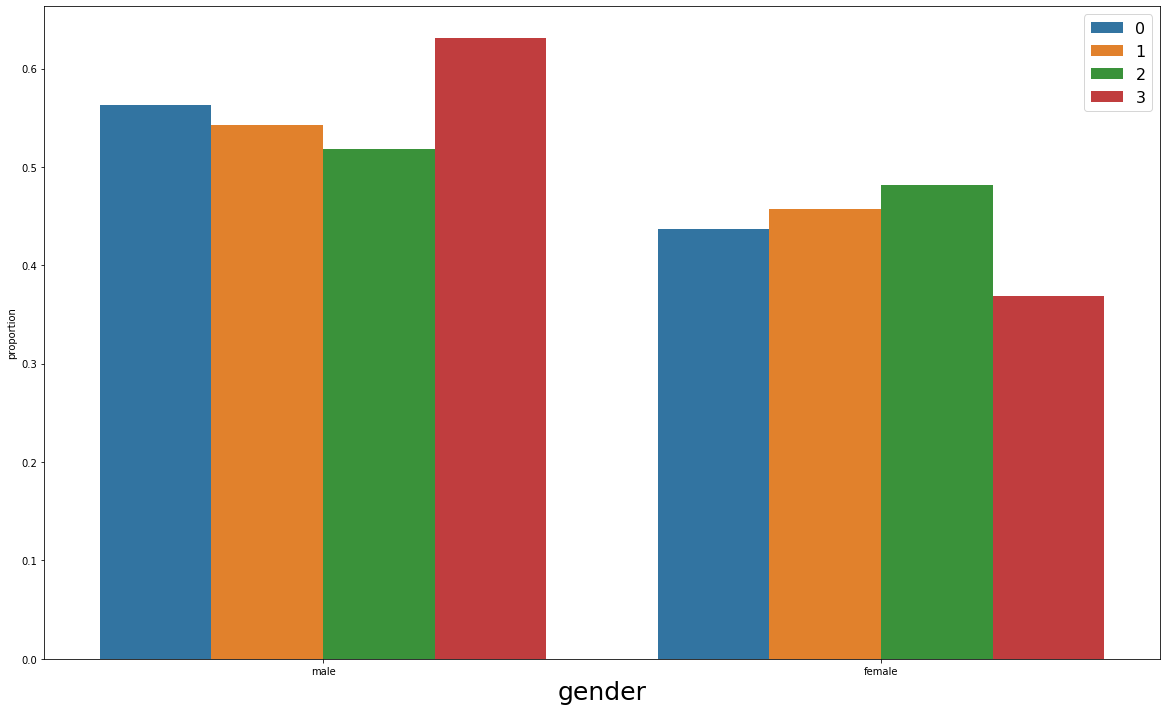

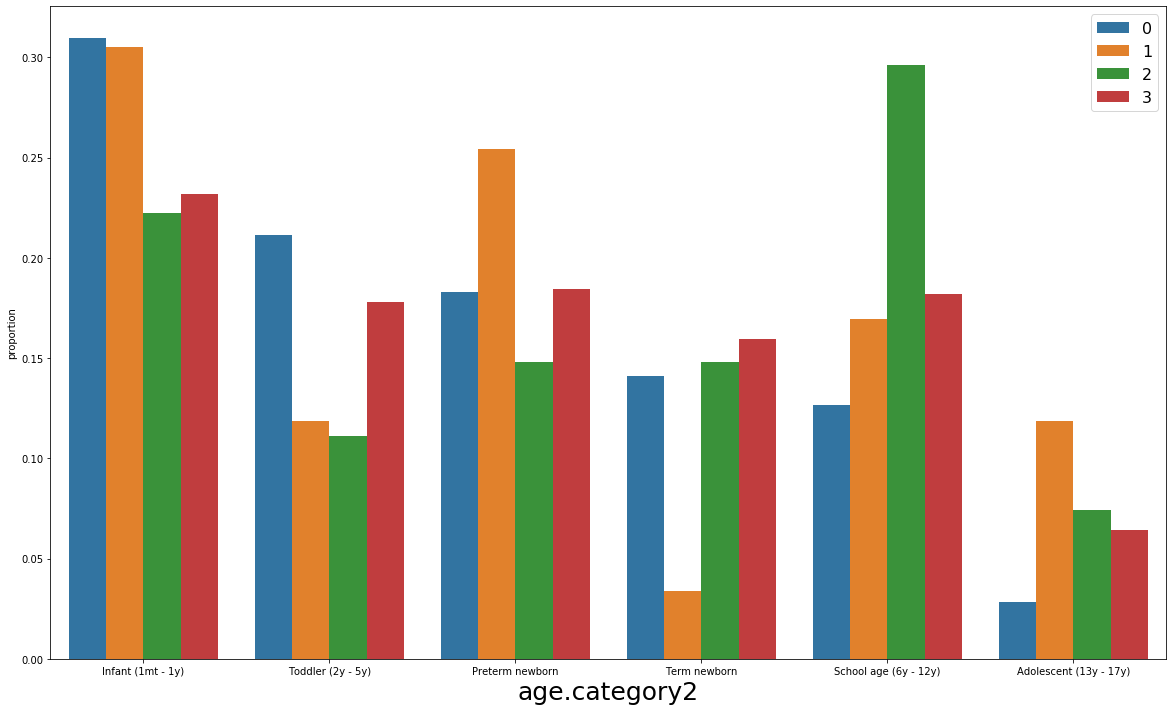

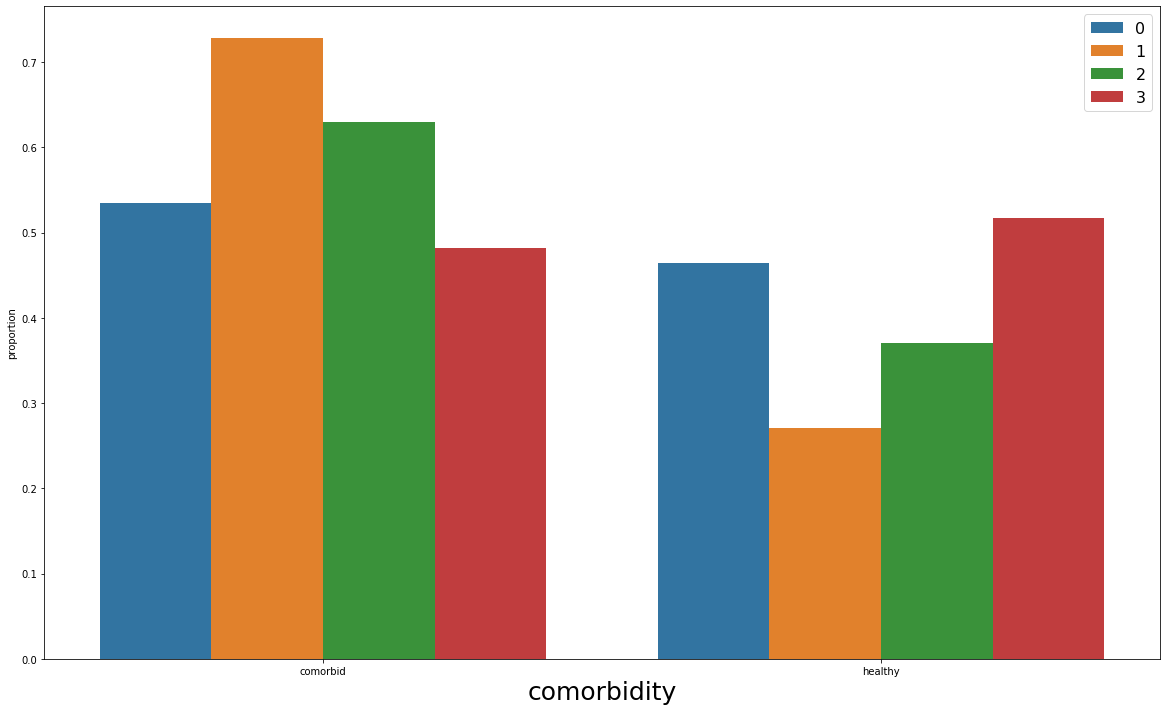

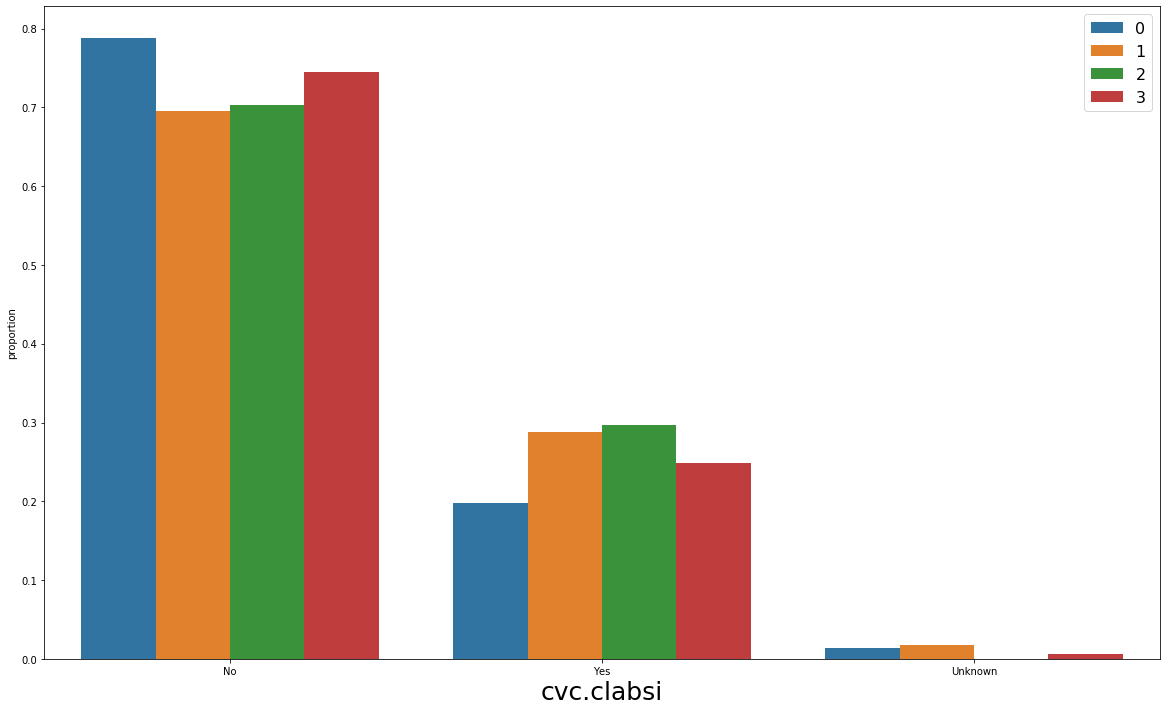

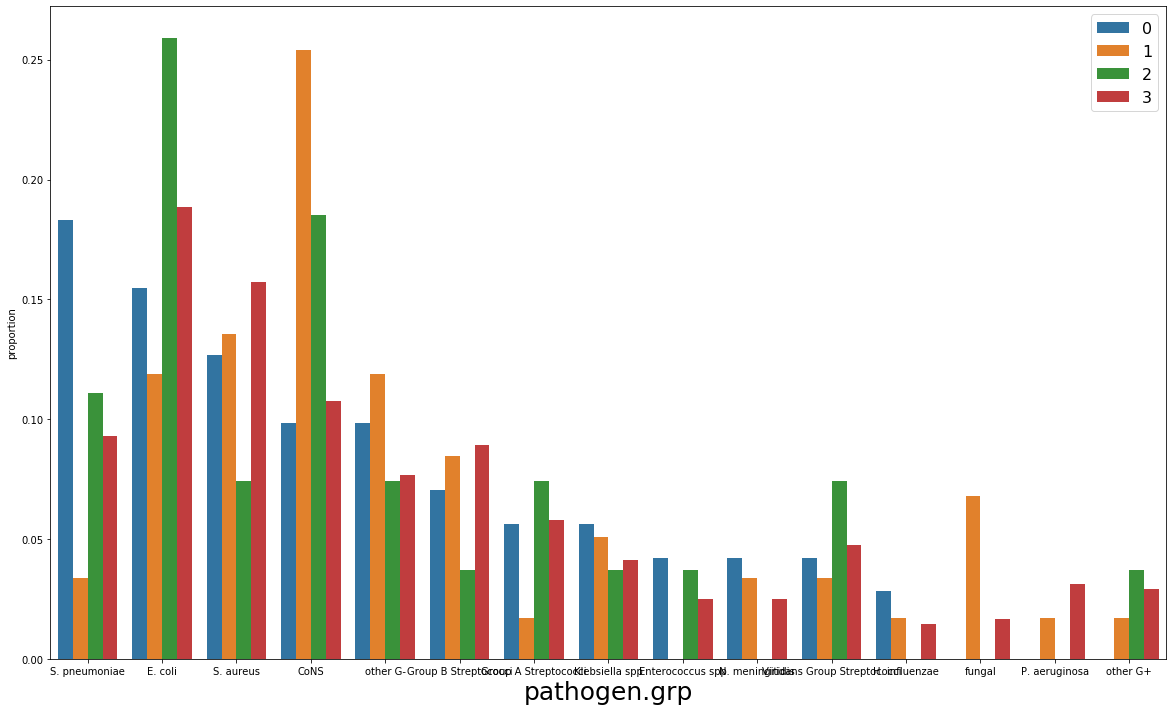

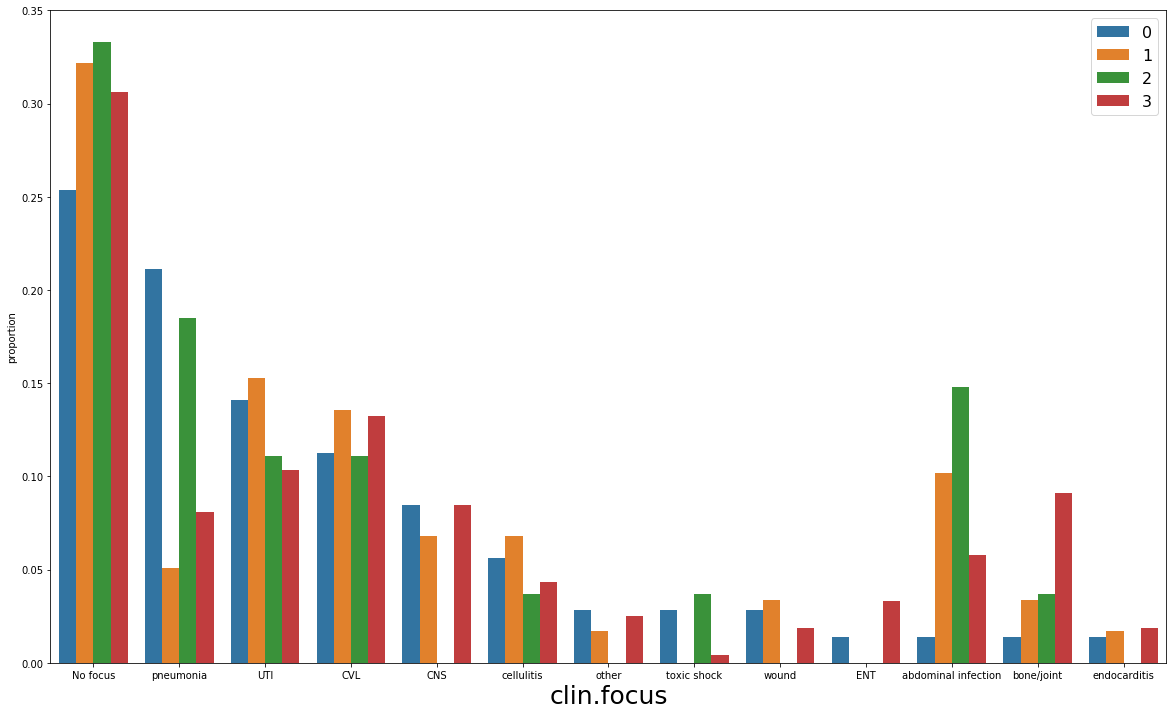

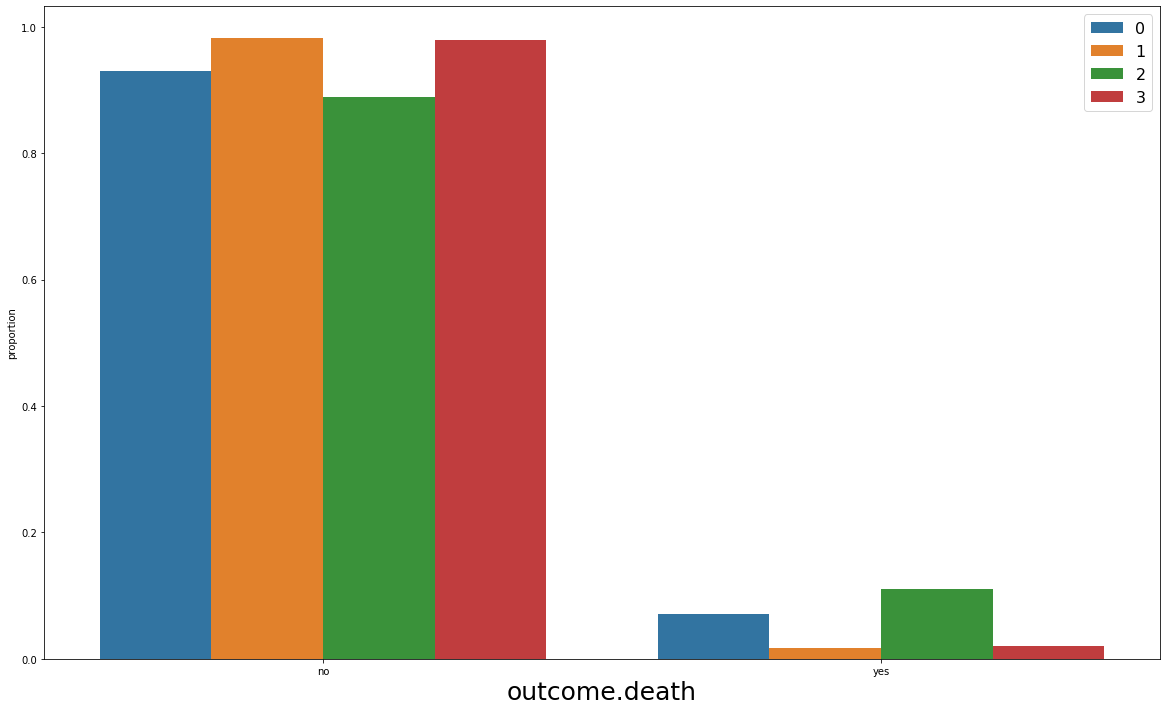

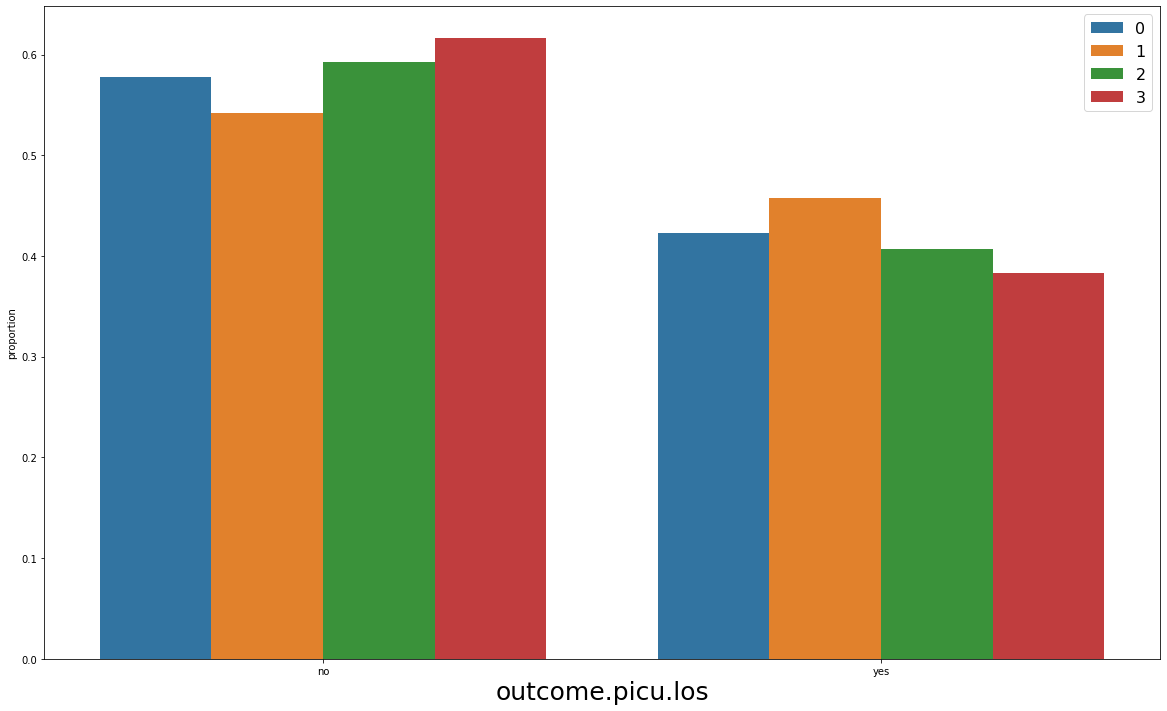

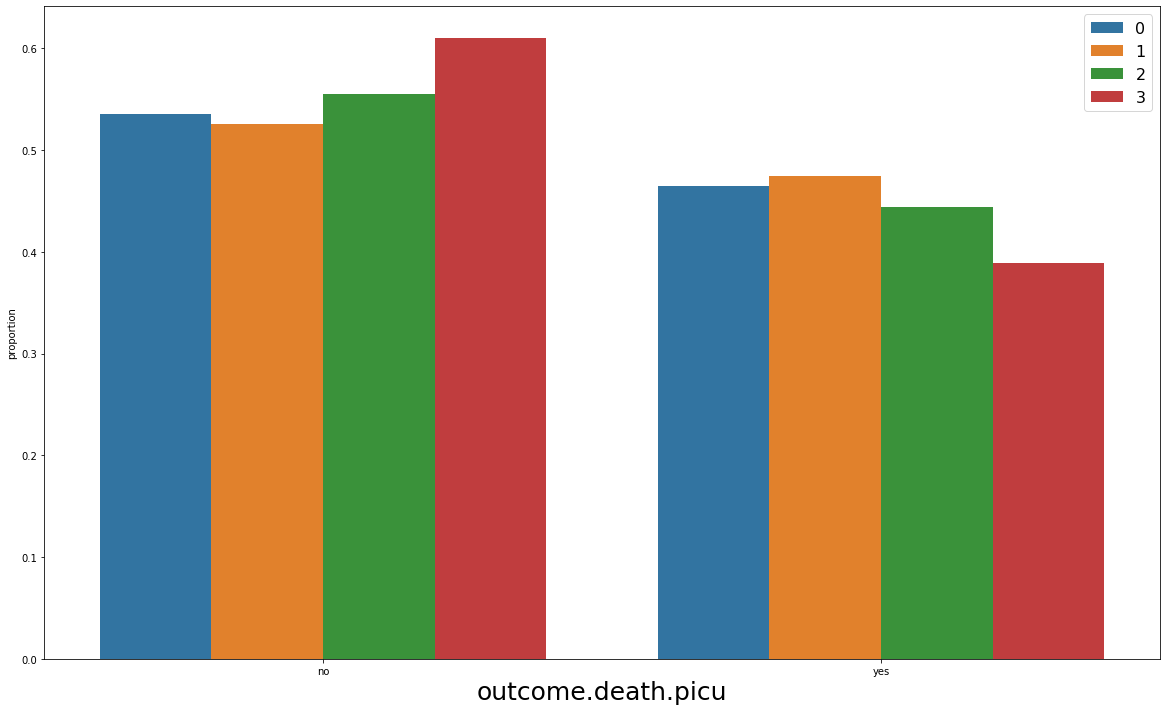

In [19]:
import seaborn as sns
cate_var_list = ['ethnicity','gender', 'age.category2', 'comorbidity', 'cvc.clabsi','pathogen.grp', 
                   'clin.focus','outcome.death', 'outcome.picu.los','outcome.death.picu']
df = phenotypes_merged
for cate in cate_var_list:
    plt.figure(figsize=(20,12))
    x, y, hue = cate, "proportion", "group"
    hue_order = ["0", "1","2", "3"]
    (df[x].groupby(df[hue])
      .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
    plt.xlabel(cate, fontsize=25)
    plt.legend(loc=1, prop={'size': 16})

# PSofa score 

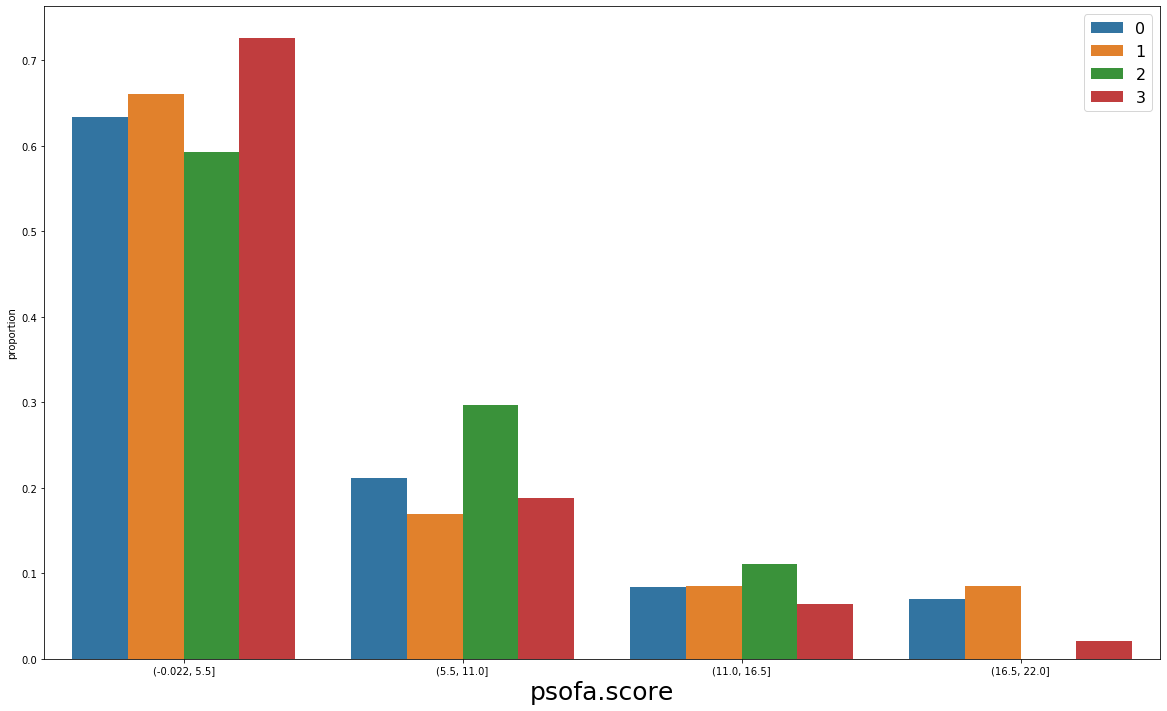

In [20]:
score_list = ['psofa.score']
phenotypes_merged = pd.concat([phenotypes_sub0,phenotypes_sub1,phenotypes_sub2,phenotypes_sub3])
df = phenotypes_merged

for var in score_list:
    df[var] = df[var].fillna(0)
    df[var]= pd.cut(df[var], bins=4)
    plt.figure(figsize=(20,12))
    x, y, hue = var, "proportion", "group"
    hue_order = ["0", "1", "2", "3"]
    (df[x].groupby(df[hue])
      .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
    plt.xlabel(var, fontsize=25)
    plt.legend(loc=1, prop={'size': 16})
    

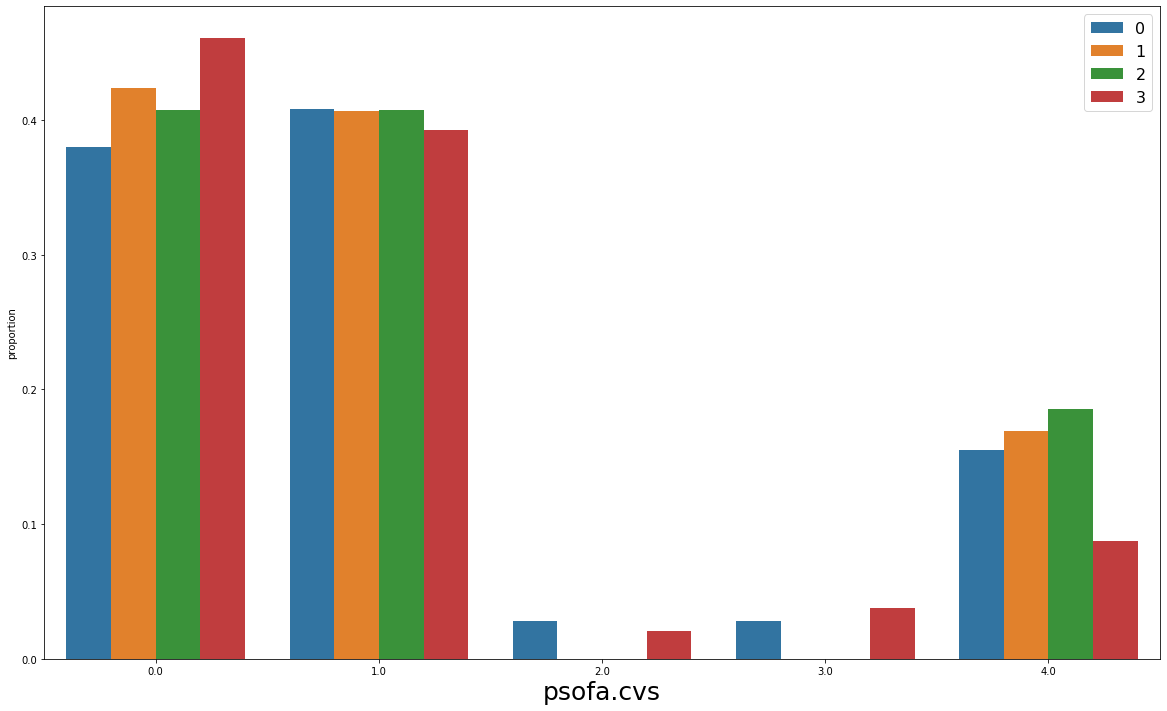

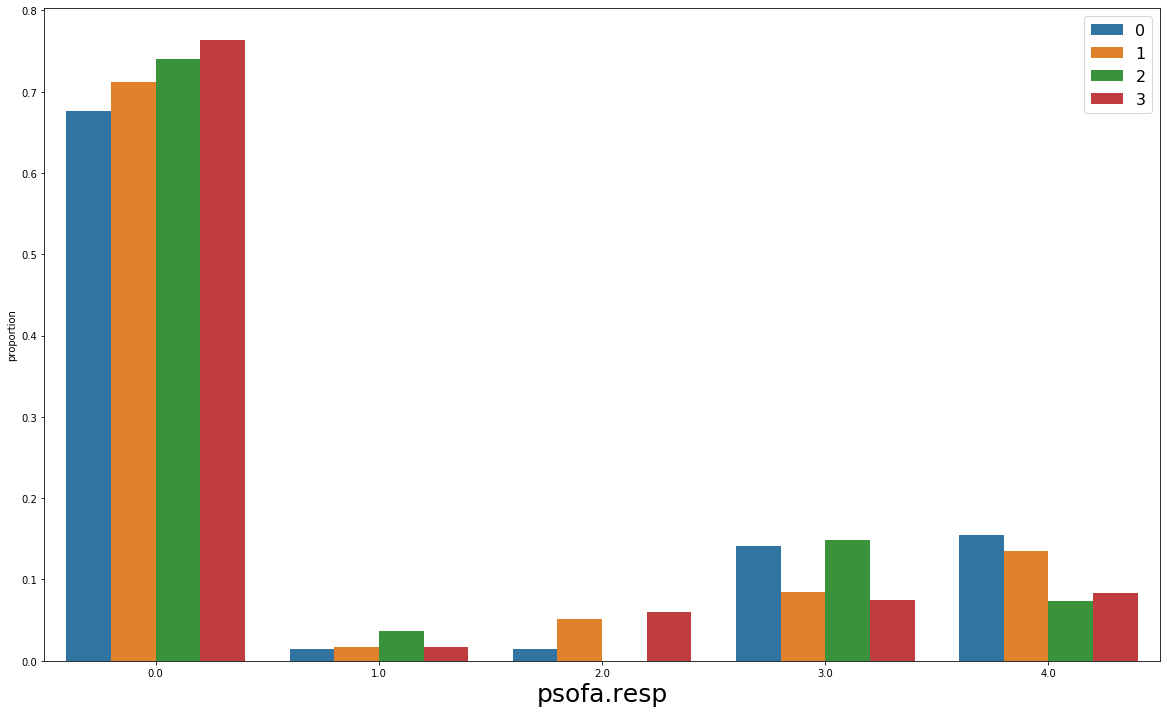

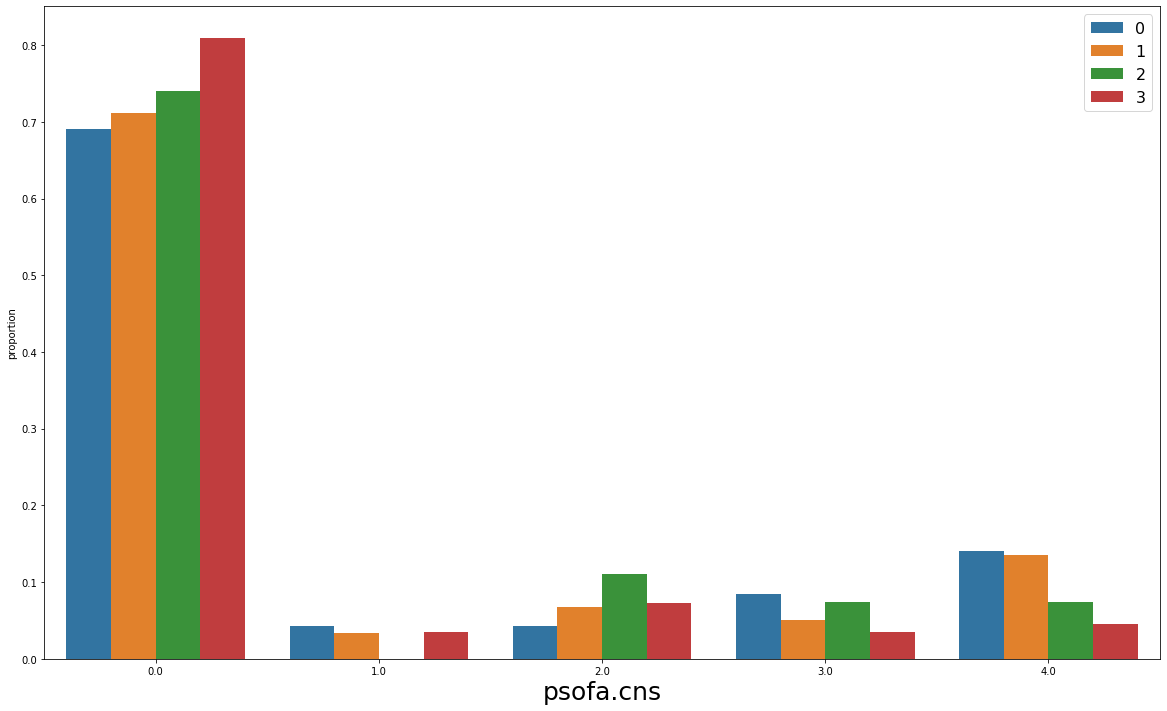

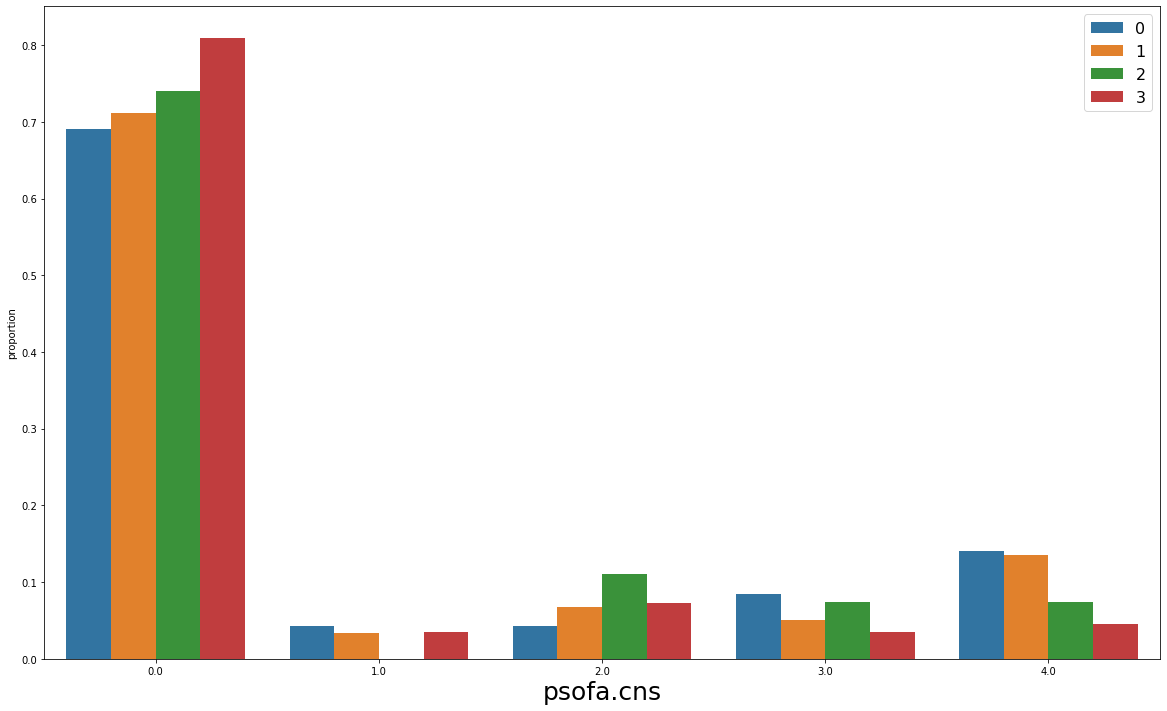

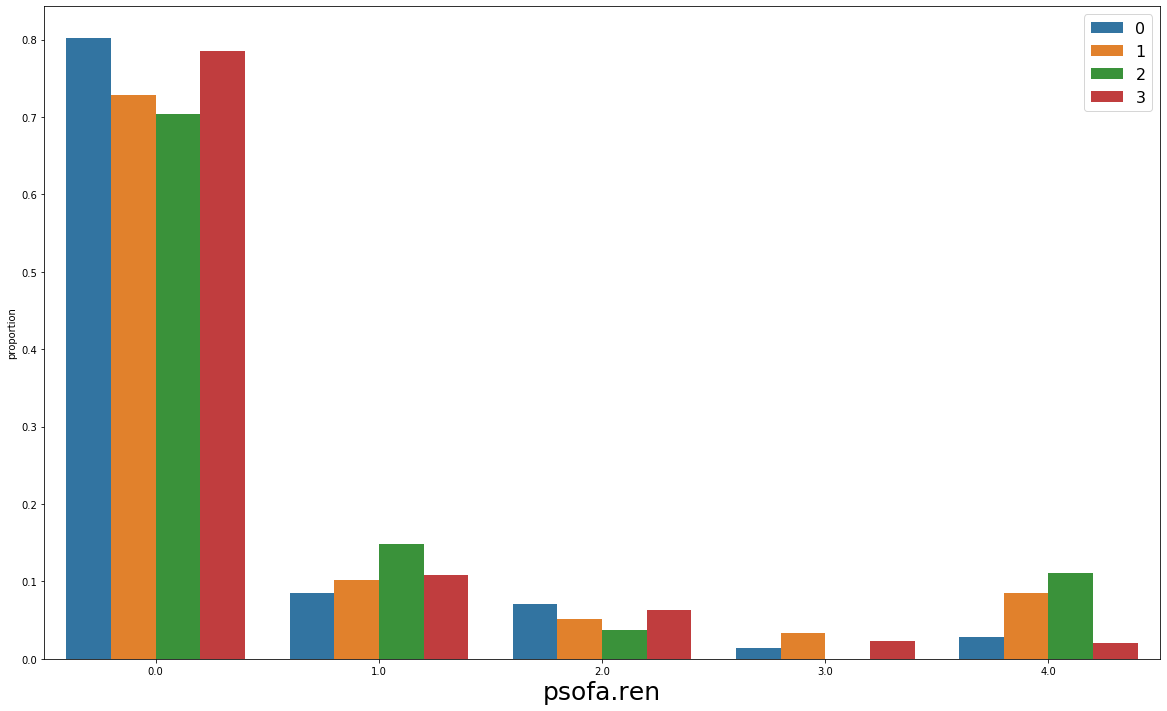

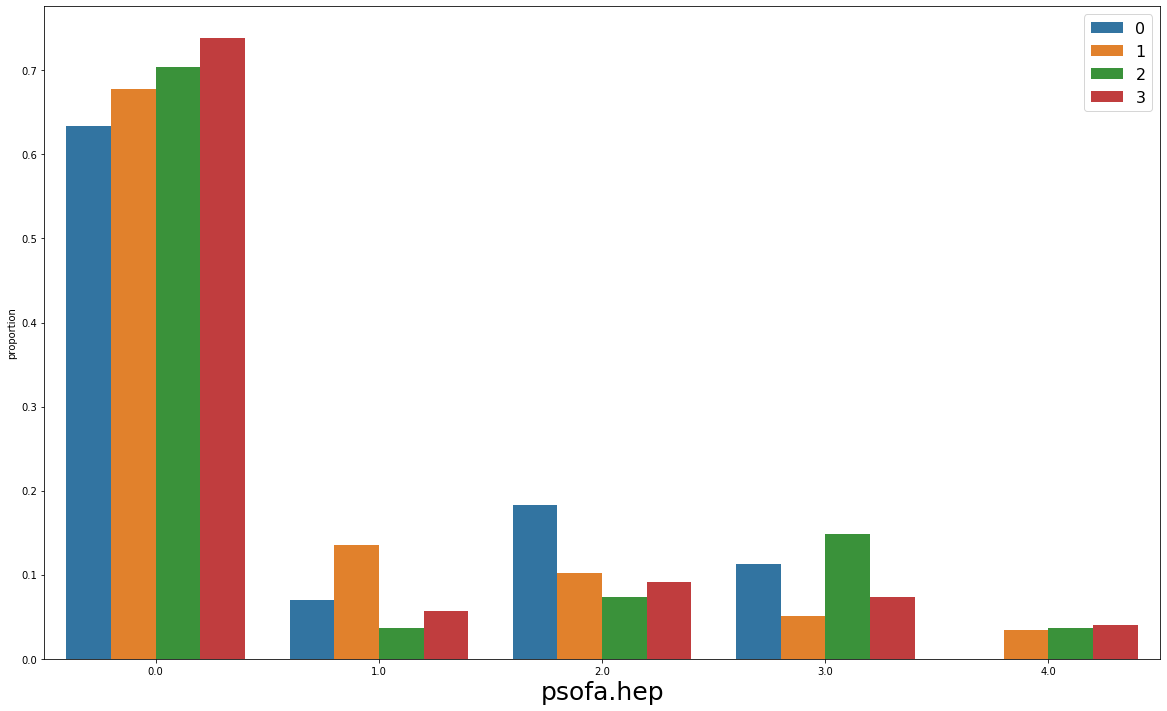

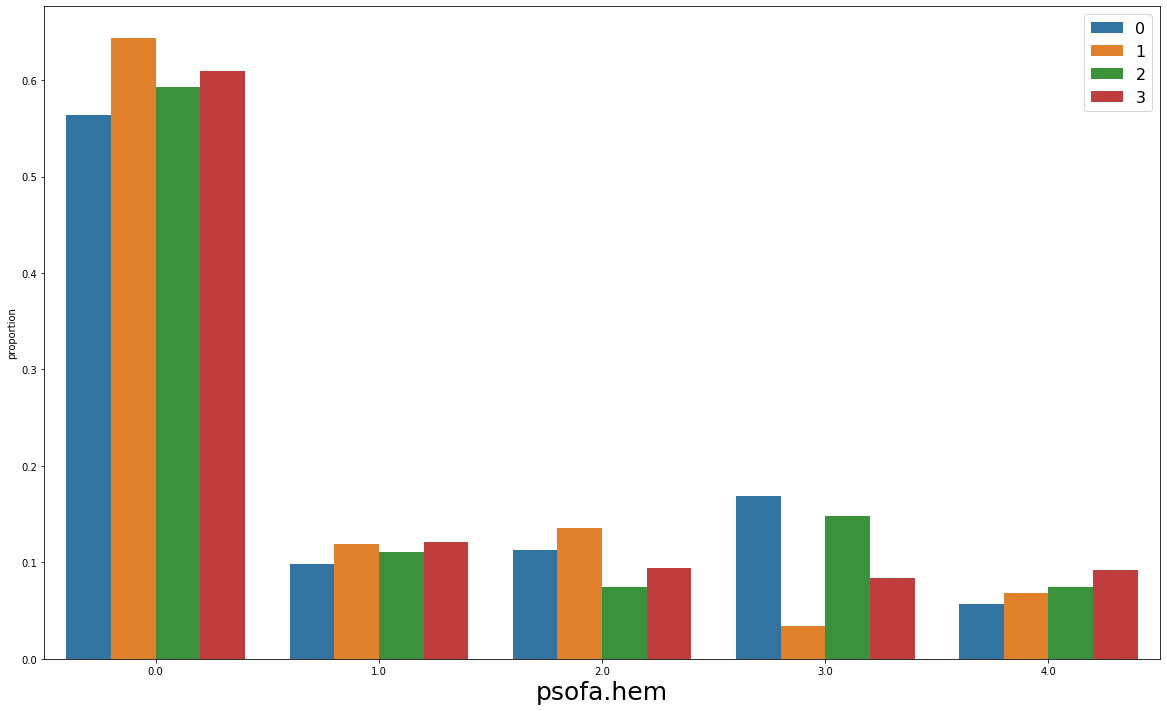

In [21]:
cate_var_list = ['psofa.cvs', 'psofa.resp', 'psofa.cns', 'psofa.cns','psofa.ren', 'psofa.hep','psofa.hem']
df = phenotypes_merged
for cate in cate_var_list:
    plt.figure(figsize=(20,12))
    x, y, hue = cate, "proportion", "group"
    hue_order = ["0", "1","2", "3"]
    (df[x].groupby(df[hue])
      .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
    plt.xlabel(cate, fontsize=25)
    plt.legend(loc=1, prop={'size': 16})

# cons05.score


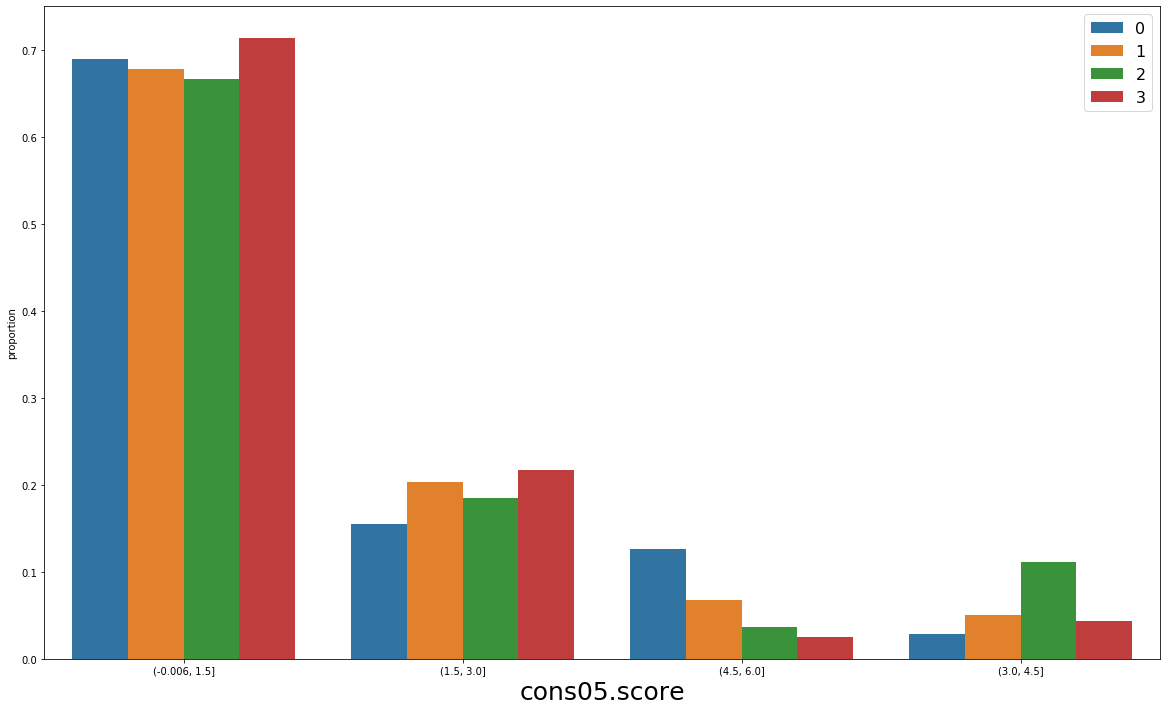

In [22]:
score_list = ['cons05.score']
phenotypes_merged = pd.concat([phenotypes_sub0,phenotypes_sub1,phenotypes_sub2,phenotypes_sub3])
df = phenotypes_merged

for var in score_list:
    df[var] = df[var].fillna(0)
    df[var]= pd.cut(df[var], bins=4)
    plt.figure(figsize=(20,12))
    x, y, hue = var, "proportion", "group"
    hue_order = ["0", "1", "2", "3"]
    (df[x].groupby(df[hue])
      .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
    plt.xlabel(var, fontsize=25)
    plt.legend(loc=1, prop={'size': 16})

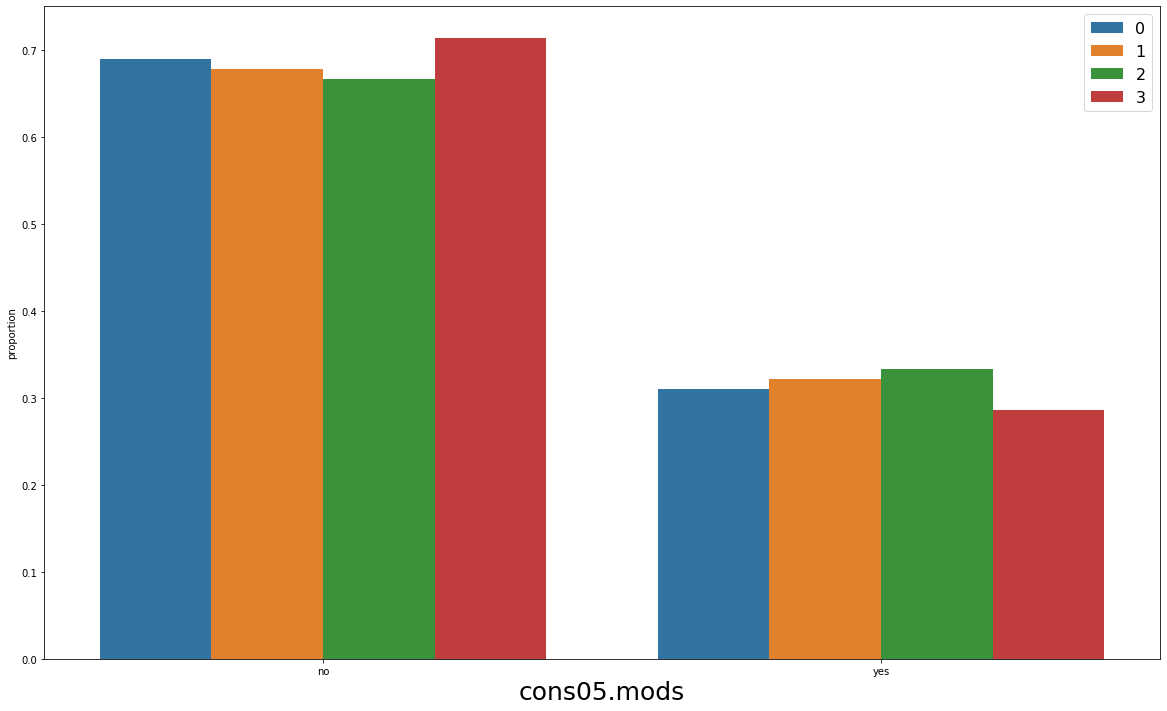

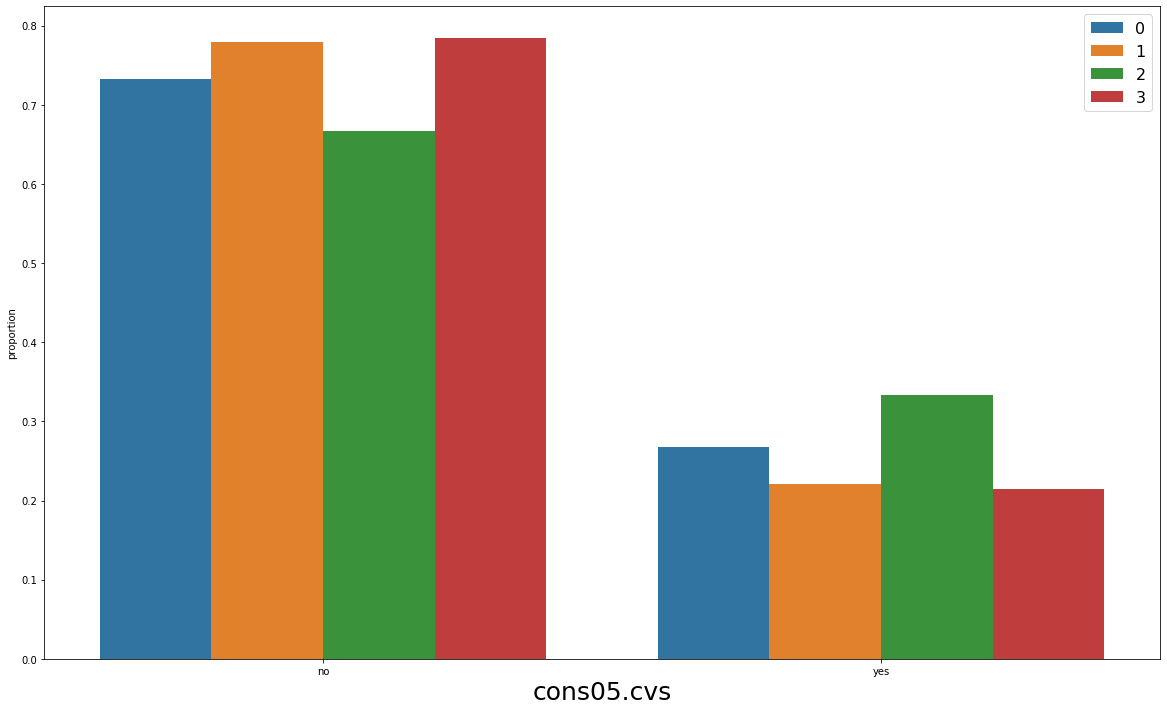

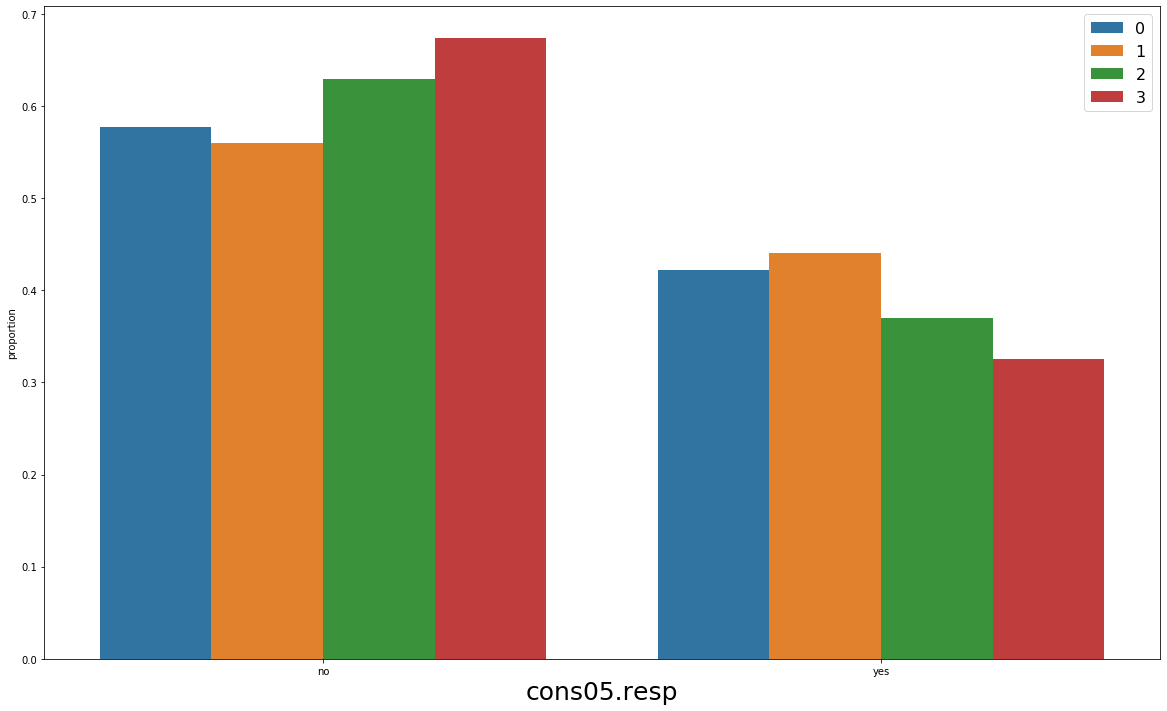

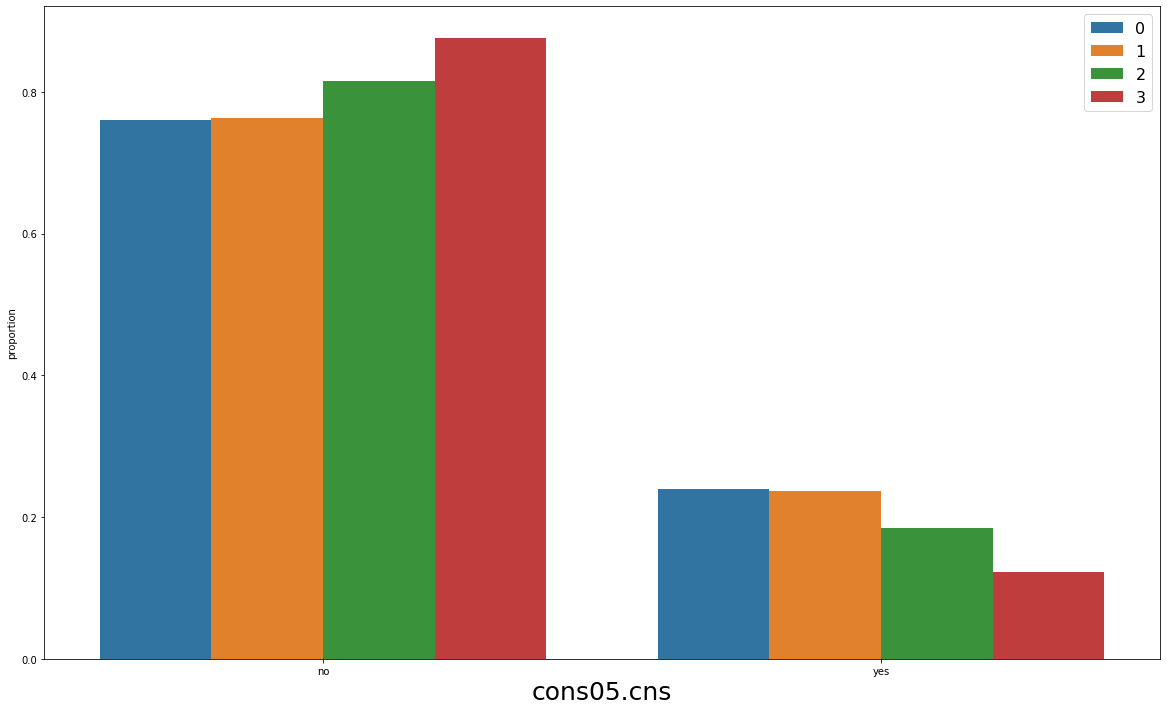

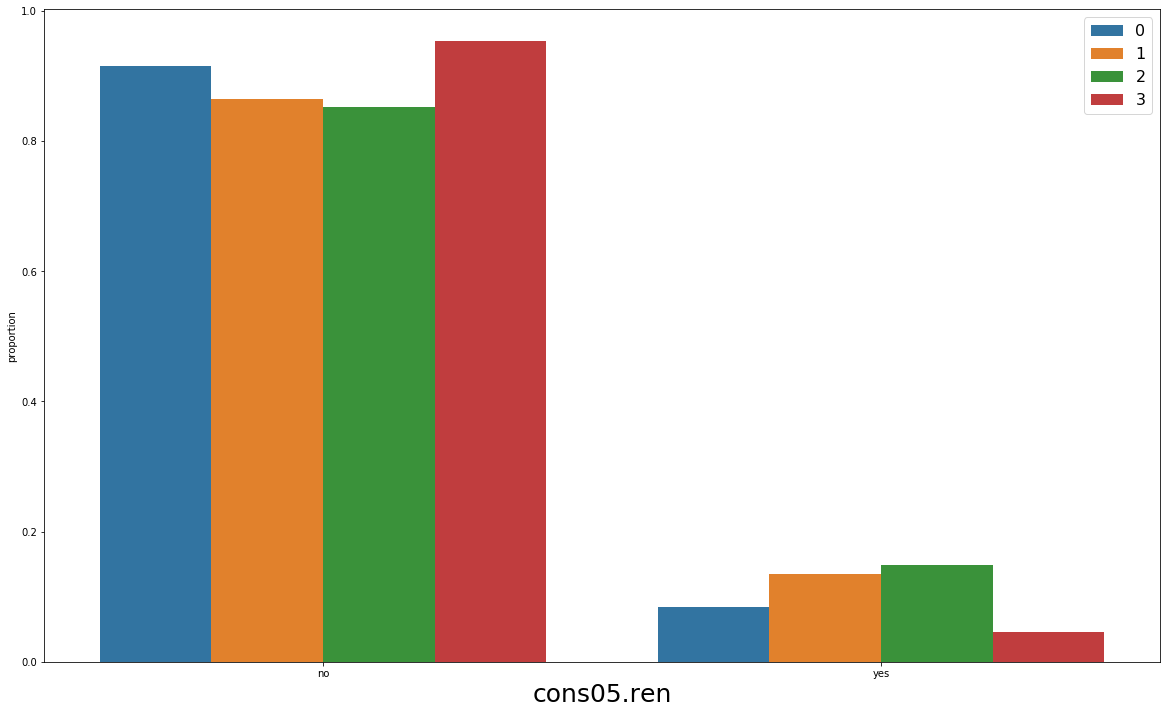

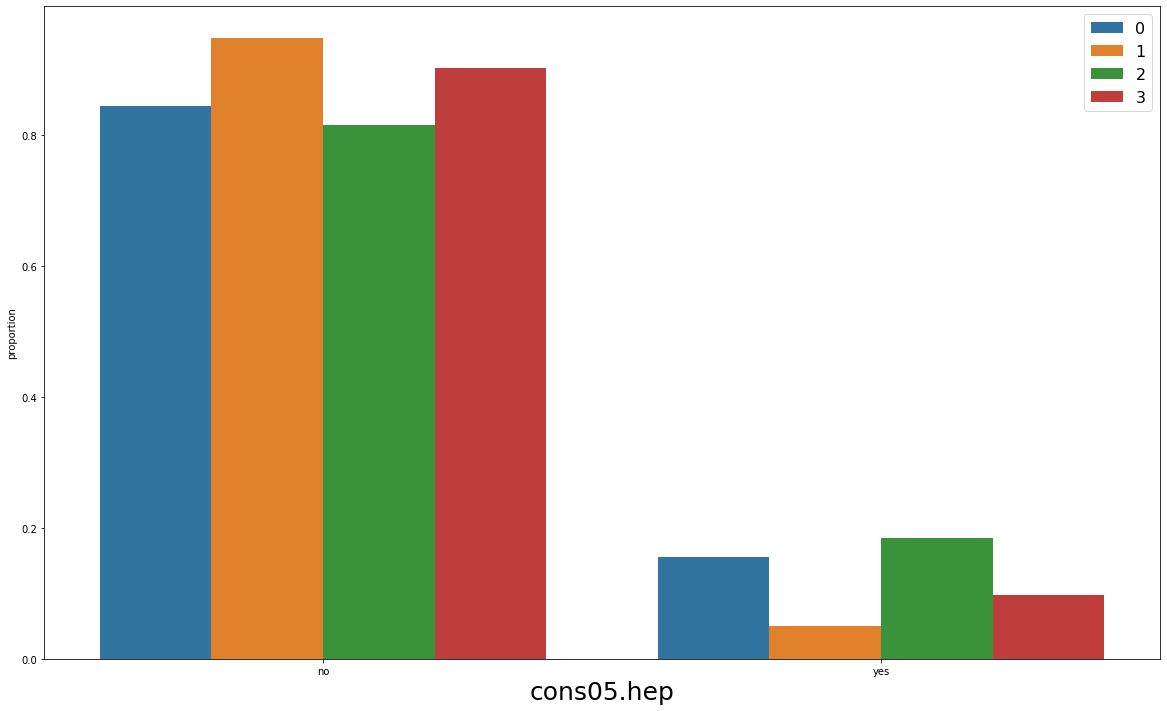

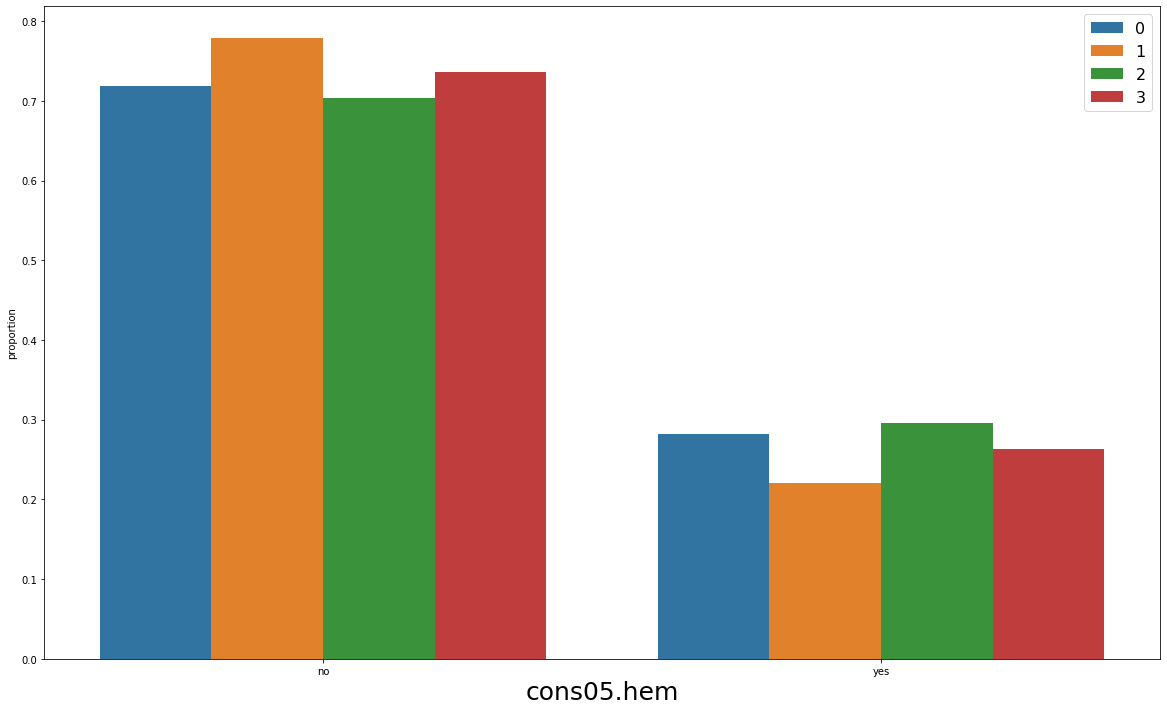

In [23]:
cate_var_list = ['cons05.mods', 'cons05.cvs','cons05.resp','cons05.cns' ,'cons05.ren','cons05.hep','cons05.hem']
df = phenotypes_merged
for cate in cate_var_list:
    plt.figure(figsize=(20,12))
    x, y, hue = cate, "proportion", "group"
    hue_order = ["0", "1","2", "3"]
    (df[x].groupby(df[hue])
      .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
    plt.xlabel(cate, fontsize=25)
    plt.legend(loc=1, prop={'size': 16})

# pelod.score

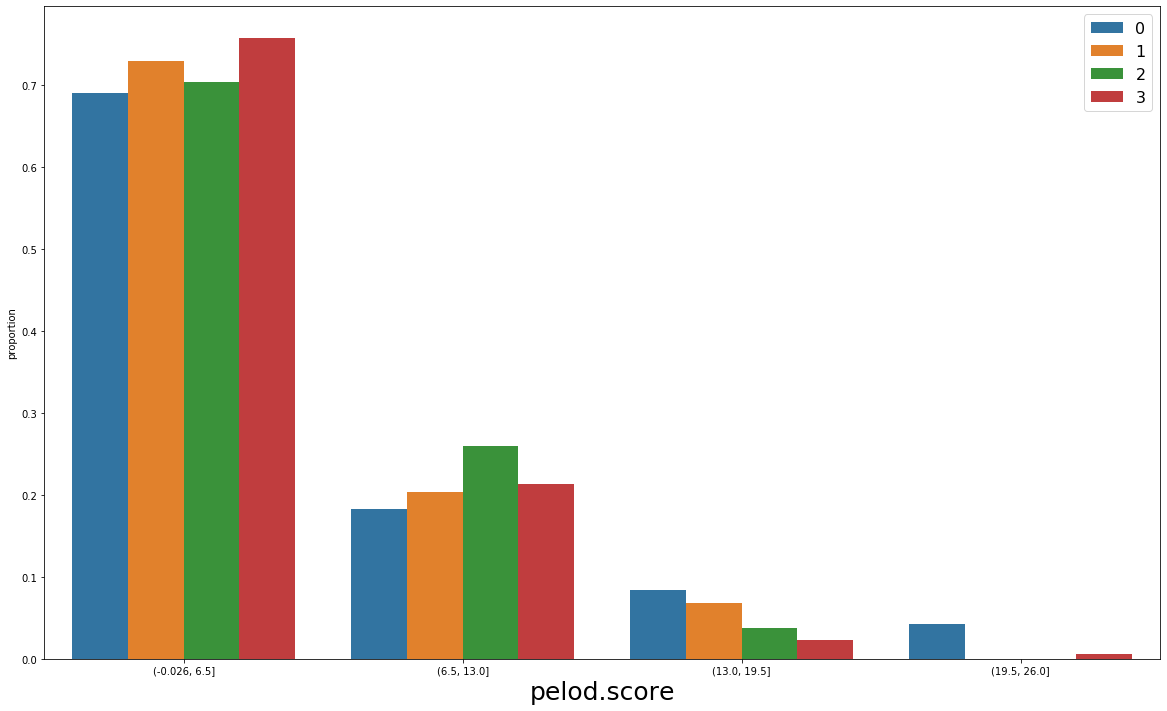

In [24]:
score_list = ['pelod.score']
phenotypes_merged = pd.concat([phenotypes_sub0,phenotypes_sub1,phenotypes_sub2,phenotypes_sub3])
df = phenotypes_merged

for var in score_list:
    df[var] = df[var].fillna(0)
    df[var]= pd.cut(df[var], bins=4)
    plt.figure(figsize=(20,12))
    x, y, hue = var, "proportion", "group"
    hue_order = ["0", "1", "2", "3"]
    (df[x].groupby(df[hue])
      .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
    plt.xlabel(var, fontsize=25)
    plt.legend(loc=1, prop={'size': 16})

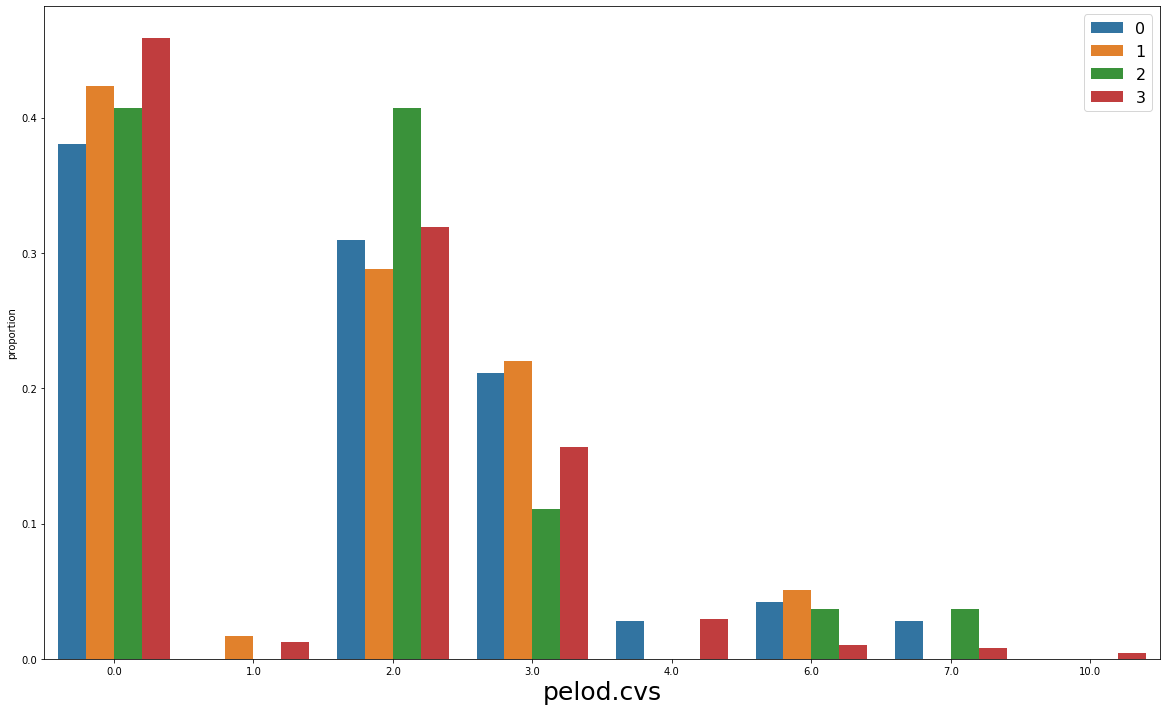

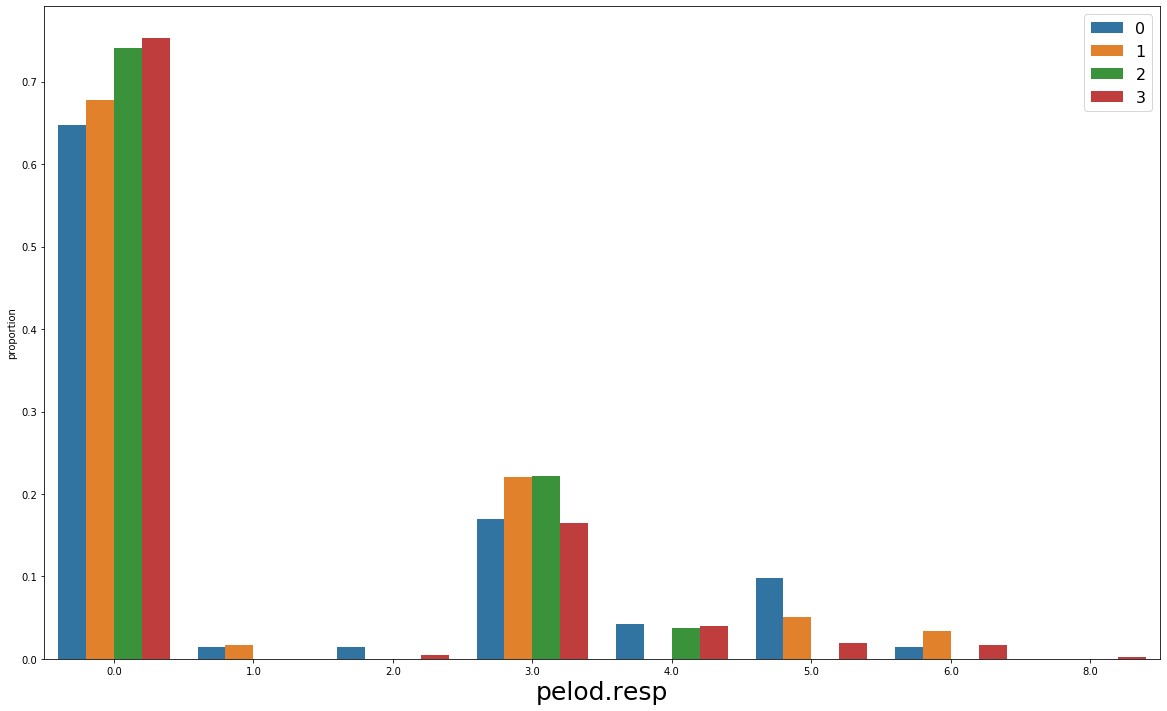

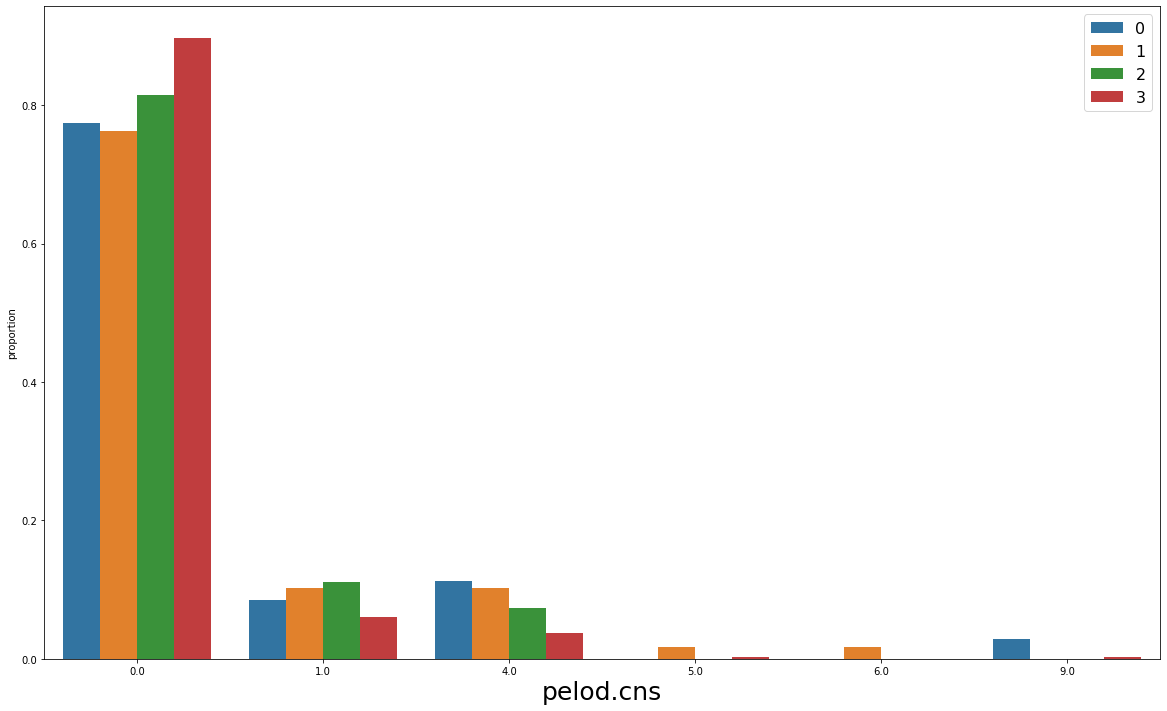

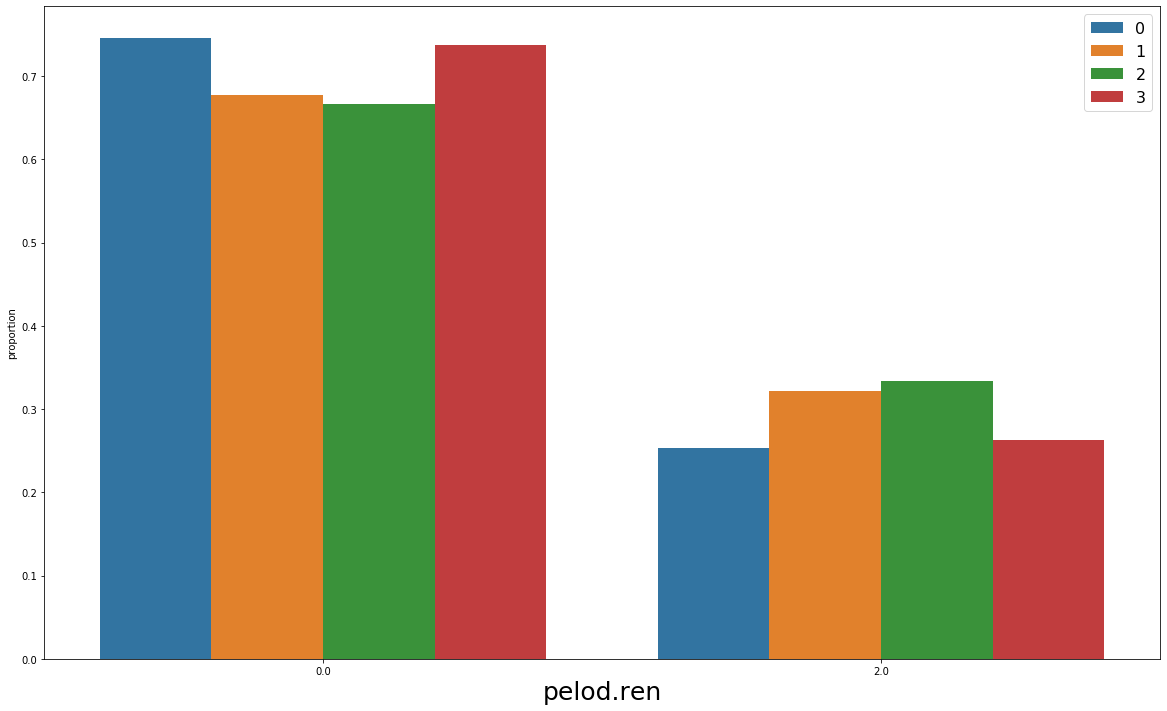

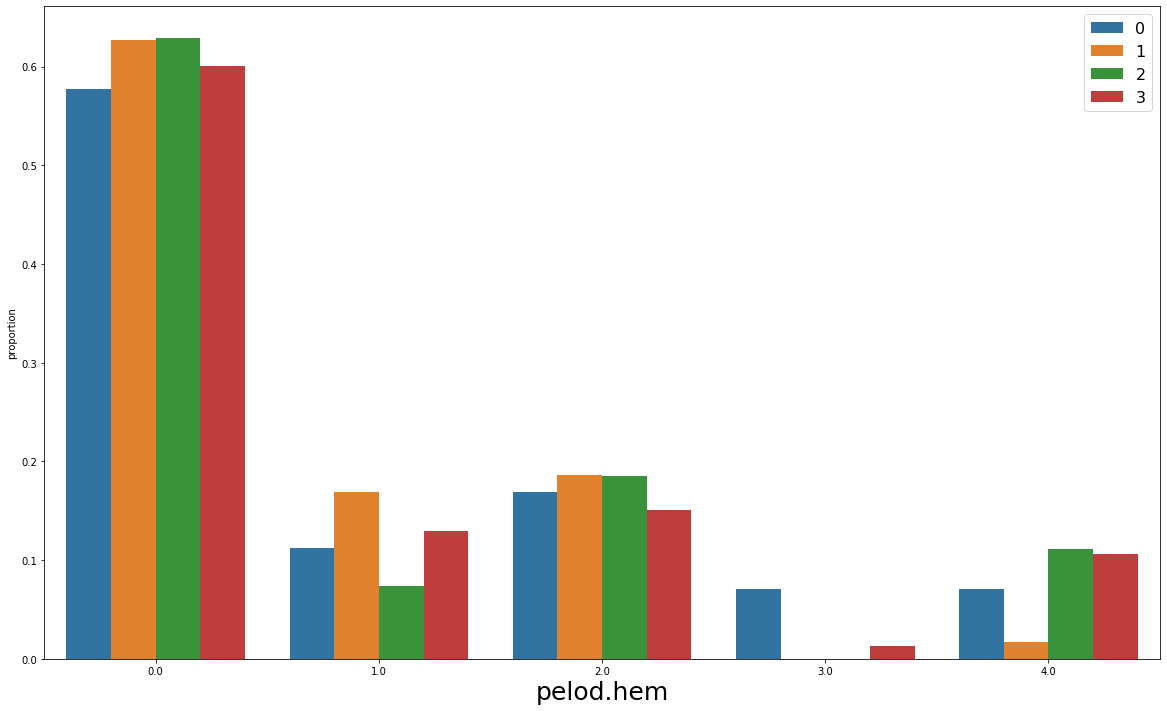

In [25]:
cate_var_list = ['pelod.cvs','pelod.resp','pelod.cns','pelod.ren','pelod.hem']
df = phenotypes_merged
for cate in cate_var_list:
    plt.figure(figsize=(20,12))
    x, y, hue = cate, "proportion", "group"
    hue_order = ["0", "1","2", "3"]
    (df[x].groupby(df[hue])
      .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
    plt.xlabel(cate, fontsize=25)
    plt.legend(loc=1, prop={'size': 16})